# Aufgabe 3.1
### Berechnen Sie für die Werte
$$ 4,2,5,6,1,6,8,3,4,9 $$
### folgende Kennzahlen mit Taschenrechner und beantworten Sie die Fragen: (je 1 P.)
## a) Wie groß ist die Standardabweichung?

$$X = [4,2,5,6,1,6,8,3,4,9]$$
$$n = 10$$
<br>
$$\bar{X}=\dfrac{4+2+5+6+1+6+8+3+4+9}{10}=4.8$$
<br>
$$Standardabweichung:= \sigma$$
<br>
$$\sigma = \sqrt{\dfrac{(4-4.8)^2+(2-4.8)^2+(5-4.8)^2+(6-4.8)^2+(1-4.8)^2+(6-4.8)^2+(8-4.8)^2+(3-4.8)^2+(4-4.8)^2+(9-4.8)^2}{10}  }$$  
$$\sigma = 2.4 $$

## b) Sind die Daten rechts- oder linksschief?


Schief kann mann mit 3es Momment berechnen <br>
<br>
$Schief = \frac{(4-4.8)^3+(2-4.8)^3+(5-4.8)^3+(6-4.8)^3+(1-4.8)^3+(6-4.8)^3+(8-4.8)^3+(3-4.8)^3+(4-4.8)^3+(9-4.8)^3}{10}$


$Schief = 2.664$


<br>
$Schief > 0: Verteilung ~ist~ rechtsschief$


## c) Sind die Daten lepto- oder platykurtisch?

Kurtosis kann mann mit 4es Momment berechnen <br>
<br>
$Kurtosis = 
\frac{(4-4.8)^4+(2-4.8)^4+(5-4.8)^4+(6-4.8)^4+(1-4.8)^4+(6-4.8)^4+(8-4.8)^4+(3-4.8)^4+(4-4.8)^4+(9-4.8)^4}{10}
$

$Kurtosis = 70.1472$

$\beta = \frac{
\frac{(4-4.8)^4+(2-4.8)^4+(5-4.8)^4+(6-4.8)^4+(1-4.8)^4+(6-4.8)^4+(8-4.8)^4+(3-4.8)^4+(4-4.8)^4+(9-4.8)^4}{10}
}{\sigma^4} = 2.1142$

<br>
$beta < 3:~ \Rightarrow Platykurtisch$

## d) Welchen Wert haben die Quartile?

Wir müssen die Werte zuerst sortieren: <br>
$Werte = [1, 2, 3, 4, 4, 5, 6, 6, 8, 9]$ <br>

$q=4$ <br>
N=10
$p_i=\frac{k_{i}}{q}~,~ i=1,..,q-1$ <br>

$Np_1= 2.5 ~ \Rightarrow Halbzahlig$ <br>
$X_{p1}=X_{[Np_1]+1}~ \Rightarrow [Np_1]+1 = 3$ <br>
$X_{p1}=X_{3}=3$
<br><br>
$Np_2= 5 ~ \Rightarrow Ganzzahlig$ <br>
$X_{p2}=~ 0.5 ~ (X_{Np_2}+ X_{Np_2+1} )~ \Rightarrow Np_2 = 5, Np_{2+1} = 6$ , X_{5}=4 , X_{6} = 5<br>
$X_{p2}=0.5\times4\times5=4.5$
<br><br>
$Np_3= 7.5 ~ \Rightarrow Halbzahlig$ <br>
$X_{p3}=X_{[Np_3]+1}~ \Rightarrow [Np_3]+1 = 8$ <br>
$X_{p3}=X_{8}=6$

## e) Gibt es Ausreißer? Wenn ja, welche?

$
Untergrenze = Q1 - 1.5 * IQR = X_{p1} - 1.5* (X_{p3}-X_{p1}) = 3-1.5*(6-3) =-1.5\\
Obergrenze  = Q3 + 1.5 * IQR = X_{p3} + 1.5* (X_{p3}-X_{p1}) = 6+1.5*(6-3) = 10.5\\
$

Es ist keine Zahl kleiner als die Untergrenze und keine Zahl größer als die Obergrenze. Es gibt keine Ausreißer.

# Aufgabe 3.2

## a) Schreiben Sie eine Funktion, die den Korrelationskoeffizienten zweier Variablen berechnet. In dieser Teilaufgabe dürfen Sie keine Pakete verwenden. (3,5 P.)

In [1]:
def Korrelation(x,y):
    if len(x) != len(y):
        print ("Beide Variablen sollen die selbe Länge haben")
        return 0
    
    x_bar= sum(x)/len(x)
    y_bar = sum(y)/len(y)
    
    a_xy=0
    a_x=0
    a_y=0
    for i in range(len(x)):
       a_xy += (x[i]-x_bar)*(y[i]-y_bar) 
       a_x += (x[i]-x_bar)**2
       a_y += (y[i]-y_bar)**2
    
    r = a_xy / ( a_x**(1/2) *   a_y**(1/2)  )
    return r

x=[10,1,2,3,4,5]
y=[9,8,7,6,5,4]

Korrelation(x,y)

0.25145944030220063

## b) Importieren Sie die Datei icecream.csv als Tabelle in einem Python Editor, zum Beispiel Spyder. Betrachten Sie die Daten und führen Sie bei Bedarf ein Data Cleaning (Datenbereinigung) durch. Was muss beachtet werden, bevor der Korrelationskoefzient berechnet werden kann? (3 P.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
df = pd.read_csv("icecream.csv")
df

,Temperature,Ice_Cream_Sales
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


In [3]:
def Quantile(q, Werte):
    x = np.zeros(q)
    n = len(Werte)
    for k in range(q):
        p = k/q
        if (n*p)==int(n*p): # ganzzahlig
            x[k] = 0.5 * (Werte[ int( p * n) - 1] + Werte[ int( p * n )])
        else:
            x[k] = Werte[ int( p * n )]
    return x[1:]

for Spalte in [np.array(df.Temperature.sort_values()), np.array(df.Ice_Cream_Sales.sort_values())]:
    quartiles = Quantile(4,Spalte)
    Interquartile_range = quartiles[2] - quartiles[0]
    untergrenze = quartiles[0] - 1.5 * Interquartile_range
    obergrenze  = quartiles[2] + 1.5 * Interquartile_range
    if len(Spalte[(Spalte<=untergrenze) & (Spalte>=obergrenze)])==0:
        print("Es gibt keine Ausreißer")
    else:
        print("Die Ausreißer sind:", Spalte[(Spalte<=untergrenze) & (Spalte>=obergrenze)])
print(df.describe())
print ( "Keine Ausreisser, ", "Keine Null-Daten: ", "\n Data cleaning ist nicht erforderlich.")

Es gibt keine Ausreißer
Es gibt keine Ausreißer
       Temperature  Ice_Cream_Sales
count    12.000000        12.000000
mean     18.675000       402.416667
std       4.011149       126.042892
min      11.900000       185.000000
25%      16.100000       330.250000
50%      18.300000       410.000000
75%      22.225000       464.250000
max      25.100000       614.000000
Keine Ausreisser,  Keine Null-Daten:  
 Data cleaning ist nicht erforderlich.


## c) Berechnen Sie den Korrelationskoeffizienten zwischen Temperature und Sales. Interpretieren Sie das Ergebnis. (1 P.)

In [4]:
print (Korrelation(df.Temperature,df.Ice_Cream_Sales) )

0.957506623002


## d) Plotten Sie die Korrelation zwischen Temperature und Sales. (1 P.)

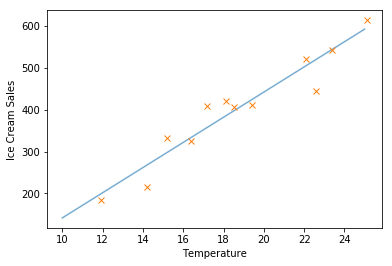

In [5]:
x = range(int(min(df.Temperature)-1),int(max(df.Temperature))+1)
plt.plot(x, stats.linregress(df)[0]*x + stats.linregress(df)[1], alpha=0.6)
plt.plot(df.Temperature,df.Ice_Cream_Sales,"x")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.show()

## e) In der PDF dieser Aufgabe finden Sie den Verlauf von 2 Aktienverläufen. Was wird als Korrlation erwartet? Begründen Sie. (1,5 P.)

Wir erwarten eine Korrelation von -1,0. Es sieht so aus, als wären die beiden Verläufe an einer horizontalen Linie gespiegelt.

# Aufgabe 3.3
## Zeigen Sie, das die Varianz des Datensatzes mit n Einträgen mittels folgender Formel berechnet werden kann: (4 P.)
$$ Var(X)=E(X^2)-E(X)^2 $$

$
\begin{matrix}
\text{Var}(X_j) &:=& \text{E}\left((X_j-\mu_j)^2\right)&||&
\text{ausmultiplizieren}\\
&=&\text{E}(X_j^2-2X_j\mu_j+\mu_j^2)&||&
\text{Linearität von E() ausnutzen}\\
&=&\text{E}(X_j^2)-\text{E}(2X_j\mu_j)+\text{E}(\mu_j^2)&||&
\text{Linearität von E() und die Definition: } E(\mu_j^2)= E(X_j)^2\\
&=&\text{E}(X_j^2)-2\text{E}(X_j)\text{E}(\mu_j)+\text{E}(X_j)^2&||&
\text{Der Erwartungswert von }\mu\text{ einer Menge ist gleich }\mu\text{der Menge}\\
&=&\text{E}(X_j^2)-2\text{E}(X_j)\text{E}(X_j)+\text{E}(X_j)^2\\
&=&\text{E}(X_j^2)-2\text{E}(X_j)^2+\text{E}(X_j)^2\\
&=&\text{E}(X_j^2)-\text{E}(X_j)^2\\
\end{matrix}$